In [28]:
import pandas as pd
import numpy as np
import string
import re
import spacy
import time
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Written by Lauren White
# CS256T_2004d Foundations of Big Data Analytics
# December 12, 2020

# This program reads the content of the 'text' column from
# the provided dataset, then cleans and tokenizes that data.

# Import and indicate target data - only interested in 'text' column.
data = pd.read_csv(r'Tweets.csv')

In [29]:
# Getting info on params for CSV - NOTE: text_clean column was not originally
# present, but has been added through testing of process_tweets function.
print("Size of dataset: ", data.shape)
print("Columns are: ", data.columns)

Size of dataset:  (14640, 15)
Columns are:  Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [30]:
def process_tweets(input_text):
    
    # Remove @s, #s, and URLs.
    remtags = re.sub(r'@\w+','',input_text)
    remhash = re.sub(r'#','', remtags)
    remurls = re.sub(r'^https?:\/\/.*[\r\n]*', '', remhash)
    
    # Remove any remaining unrelated characters.
    whitelist = string.ascii_letters + string.digits + ' '
    remsymbols = ''.join(char for char in remurls if char in whitelist)
  
    # Reduce words to their base form (lemmatize) & remove punctuation
    punctuations = string.punctuation + '...' # Define punctuation marks
    nlp = spacy.load('en_core_web_sm') # Load spacy nlp pipeline
    lem = nlp(remsymbols) # Apply spacy nlp pipeline to strings
    
    lemmed=[]
    for word in lem:
        word = word.lemma_.lower().strip()
        if ((word not in punctuations) & (word != '-pron-')):
            lemmed.append(word)
   
    # Remove stopwords & return clean, tokenized tweet.
    stop_words=set(stopwords.words('english'))
    cleaned_tweet=[word for word in lemmed if word not in stop_words]
    return cleaned_tweet

In [31]:
# Apply the process_tweets function to the data and save to a new column in the CSV.
start = time.time()
data['text_clean'] = (data['text'].apply(process_tweets))
data.to_csv(r'Tweets.csv')
end = time.time()
print(end-start)

7800.922505617142


In [67]:
# Combine all review tokens into one variable. Had to bring back whitelist var to
# to clean it up. 
whitelist = string.ascii_letters + string.digits + ' '
all_text = ''
all_text = ' '.join([str(elem) for elem in data['text_clean']])
all_text = ''.join(char for char in all_text if char in whitelist)
print(type(all_text))

<class 'str'>


In [ ]:
# Take a look at the word frequencies by running that against our new BoW.
wordlist = all_text.split()
wordfreq = [wordlist.count(word) for word in wordlist] # generate a count

# Return a dictionary of word, count.
wordfreqpairs = dict(list(zip(wordlist, wordfreq)))
print(wordfreqpairs)

<function matplotlib.pyplot.show(*args, **kw)>

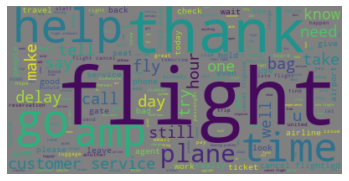

In [69]:
# Setting up and generating the word cloud.
wordcloud = WordCloud(background_color="gray").generate_from_frequencies(wordfreqpairs)

# Display the generated image with matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show